## 선형 모델(Linear Models)
- 선형 모델은 100여년 전에 개발되었고, 지난 몇십 년 동안 폭넓게 연구되고 현재도 널리 쓰임
- 선형 모델은 입력 feature에 대한 선형 함수를 만들어 예측을 수행

### 회귀의 선형 모델
- 회귀의 경우 선형 모델을 위한 일반적인 예측함수는 다음과 같음
- 예측y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b
- x[0]부터 x[p] 까지는 하나의 데이터 포인트에 대한 feature를 나타내며(feature의 수는 p+1)
- w 와 b는 모델이 학습할 파라미터
- 그리고 예측y는 모델이 만들어낸 예측값
- 특성이 하나인 데이터셋이라면 식은 다음과 같음
- 예측y = w[0] * x[0] + b
- w[0] 는 기울기이고 b는 y축과 만나는 절편
- feature가 많아지면 w는 각 feature에 해당하는 기울기를 모두 가짐
- 다르게 생각하면 예측값은 입력 feature에 w의 각 가중치(음수도 가능)를 곱해서 더한 가중치 합으로 볼 수 있음

In [20]:
# 기울기 a => x가 1unit만큼 증가할때, 결과값 y 에 얼마만큼(a) 영향을 미치는가
# 라는 식으로 봐야 함 이제.


#출처
# https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-3-%EC%84%A0%ED%98%95-%EB%AA%A8%EB%8D%B8/

In [2]:
# https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%*8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/
# 이곳의 내용임

w[0]: 0.393906  b: -0.031804


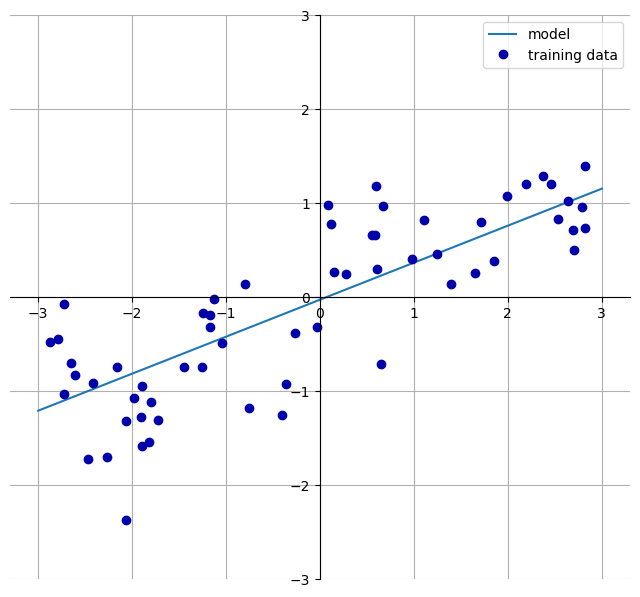

In [3]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_linear_regression_wave()  # import mglearn  필요
plt.show()   # import matplotlib.pyplot as plt 필요

- 회귀를 위한 선형 모델은 feature가 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가짐\
2차원까진 그림으로 가능, 그림으로 못그리는 3차원 이상을 => 초평면(hyperplane)이라고 부름
- 이 직선과 KNeighborsRegression을 사용하여 만든 이전 그림의 선과 비교해 보면 직선을 시용한 예측이 더 제약이 많아 보임
- 즉, 데이터의 상세 정보를 모두 잃어버린 것처럼 보임(어느 정도 사실) = 평균값으로 몰려서 특징을 상실
- target y가 feature들의 선형 조합이라는 것은 매우 과한(때론 비현실적인) 가정임
- 하지막 1차원 데이터셋만 놓고 봐서 생긴 편견일 수 있음
- feature가 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있음
- 회귀를 위한 선형 모델은 다양하게 존재, 이 모델들은 훈련 데이터로부터 모델파라미터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 남

### 선형 회귀(최소제곱법): Ordinary least squares
- 선형 회귀(linear regression) 또는 최소제곱법(ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘
- 선형 회귀에는 예측과 훈련 세트에 있는 target y 사이의 평균제곱오차(meansquared error)를 최소화 하는 파라미터 w와 b를 찾음
- 평균제곱오차는 예측값과 target 값의 차이를 제곱하여 더한 후에 샘플의 수로 나눈 것
- 최소제곱법은 추가 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없음

In [4]:
# 이 찾는 방법은 deep learning할때 찾을거임
# 얘를 scikit-learn으로 해봅시다

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60) # wave 생성, sample 수 = 60
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 이 상태에서 linear regression 만들고 바로 fit
lr = LinearRegression().fit(X_train, y_train)

# 최소가 되는 w,b를 찾아서 맞춤 -> 어떻게 찾는지는 deep learning할때 봅시다

- 기울기 파라미터 w는 가중치(weight) 또는 계수(coefficient) 라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향(bias) 또는 절편(intercept) 파라미터 b는 intercept_ 속성에 저장되어 있음

In [6]:
# 얘를 한번 찍어보자
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)  

# lr.coef_: [0.39390555]  -> 이게 w 값
# lr.intercept_: -0.031804343026759746   ->  이게 b값

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


- intercept_ 속성은 항상 실수값 하나지만, coef_ 속성은 각 입력 feature에 하나씩 대응되는 Numpy 배열임
- wave 데이터셋에는 입력 feature가 하나뿐이므로 lr.coef_ 도 원소를 하나만 가지고 있음

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 0.66이 나옴 -> 별로 신통치 않음. (Training set score: 0.67, Test set score: 0.66)
# 2개의 점수가 비슷하면서 점수가 낮음. => Underfitting 상태

Training set score: 0.67
Test set score: 0.66


- 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷, 즉 과대적합이 아니라 과소적합인 상태를 의미(=너무 단순하므로)
- 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없음
- 그러나 feature 가 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음

In [8]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [10]:
# 훈련은 높은데, test는 낮음 -> 과대 적합(Overfitting)
# feature가 너무 많아서 복잡해진 경우 -> 과대적합되었다

- 이런 성능의 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함

In [11]:
# 오늘 끝. 목.

In [12]:
# 날짜 바뀜. 금

### Ridge Regression
- 리지도 회귀를 위한 선형 모델이므로 최소제곱법에서 사용한 것과 같은 예측 함수를 사용
- 하지만 리지 회귀에서는 가중치 w 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
- 가중치의 절대값을 가능한 한 작게 만드는 것, 즉 w의 모든 원소가 0에 가깝게 되길 원함
- 이는 모든 feature가 출력에 주는 영향을 최소한으로 만듬(기울기를 작게 만듬)
- 이런 제약을 규제(Regularization)라 함
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
- 리지 회귀에 사용하는 규제 방식을 L2 규제라 함

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# 어제(위에서 한거)한거 와 비교,  과대적합에서 빠져나옴 -> test점수 높아짐

Training set score: 0.89
Test set score: 0.75


- 훈련 세트의 점수는 LinearRegression 보다 낮지만 테스트 세트에 대한 점수는 더 높음
- 모델의 복잡도가 낮아지면 훈련 세트의 성능은 나빠지지만 더 일반화된 모델이 됨
- Ridge 는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공함
- 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할 지를 지정
- 앞의 예제에서는 기본값인 alpha=1.0 을 사용
- alpha 값을 높이면(규제를 더 강하게) 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에 도움을 줌

In [16]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


- alpha 값을 줄이면(규제를 더 약하게) 계수에 대한 제약이 그만큼 풀리면서 과대적합쪽으로 이동하는 경향이 됨
- 아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐(alpha=0.00001)

In [17]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


- 이 코드에서는 alpha=0.1 이 꽤 좋은 성능을 보임
- 테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것임
- alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해 보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있음
- 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다, coef_의 절댓값 크기가 작을 것이라고 예상할 수 있음

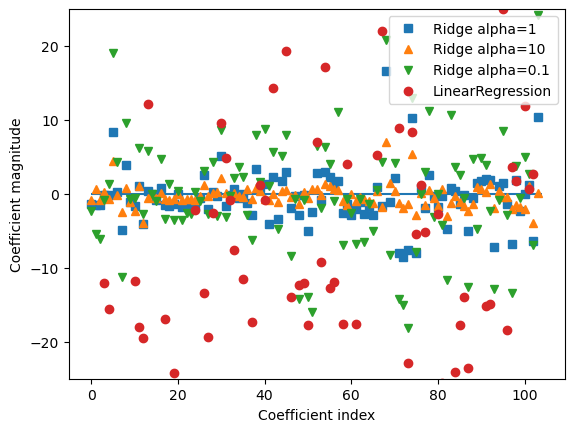

In [19]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


#출처
# https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-3-%EC%84%A0%ED%98%95-%EB%AA%A8%EB%8D%B8/


///87/653652//**
*//*/9889/-- x축은 coef_ 의 원소를 위치대로 나열, y 축은 각 계수의 수치+/8/8/*8/8*9/*

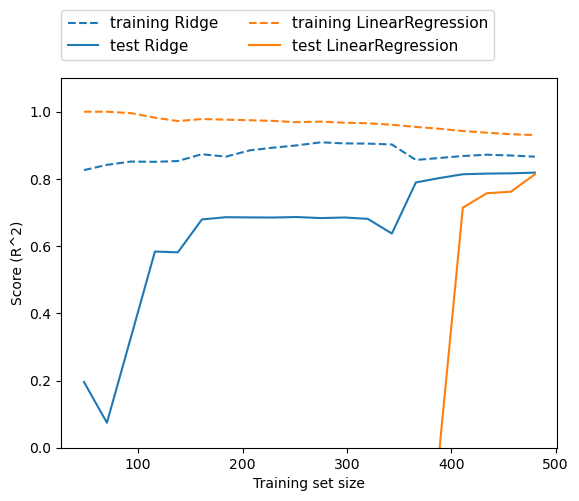

In [ ]:
mglearn.plots.plot_ridge_n_samples()
plt.show()

- 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용한 것임
- 이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(Learning curve) 라고 함
- 리지는 규제가 적용되므로 선형 회귀보다는 전반적으로 훈련 데이터 점수가 낮음
- 그러나 테스트 데이터에서는 리지의 점수가 더 높음
- 두 모델 전부 데이터가 많아질수록 성능이 향상됨
- 데이터가 많아질수록 선형 회귀의 모델은 데이터를 기억하나 과대적합하기가 어려워짐을 보임

### 라소(Lasso)
- 리지 회귀에서와 같이 라소도 계수를 0에 가깝게 만들려고 함
- L1 규제를 사용함, 실제 특정 계수는 0이 됨, 즉 모델에서 완전히 제외되는 feature가 생김
- 일종의 feature selection이 자동으로 이루어짐
- 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 feature가 무엇인지 드러내 줌

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.29
Test set score: 0.21


In [26]:
# 전체 라소가 104였는데, 전체 104개 중 몇개를 수행하나 보자

import numpy as np
print("Numbver of features used:", np.sum(lasso.coef_ != 0))

Numbver of features used: 4


In [27]:
# 전체중에 4개밖에 사용 안함

In [28]:
# alpha값을 위에서 한거처럼 줄여보자

In [30]:
# max_iter 늘려주라고 경고가 뜨는데 안늘려주면 문제 생김
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)  # max_iter -> 학습하기 위해 반복한 횟수)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Numbver of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Numbver of features used: 33


- alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테스트 세트에서의 성능이 좋아짐
- 성능은 리지보다 비슷하거나 조금 더 좋게 나오는데 사용된 특성은 104개 중 33개 뿐이어서 아마도 모델을 문석하기가 더 쉬워짐
- 그러나 alpha 값을 너무 줄이면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해 짐

In [32]:
# 그럼 alpha 값을 엄청 낮춰 봅시다

In [33]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)  # max_iter -> 학습하기 위해 반복한 횟수)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Numbver of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Numbver of features used: 96


In [34]:
# alpha값을 낮추니까, 전형적인 Overfitting이 되버림

In [35]:
# 그래프를 그려보자

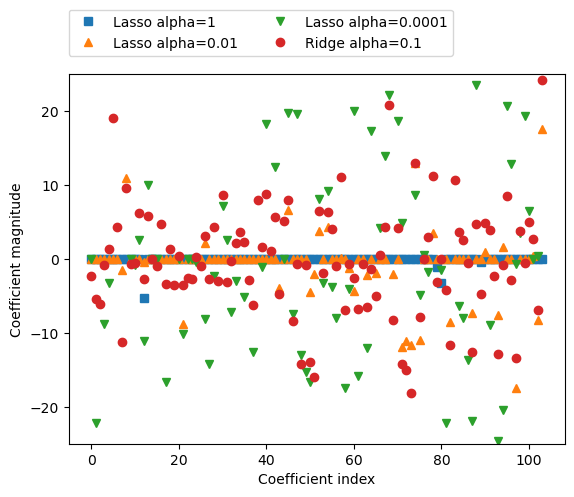

In [36]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

- alpha=0.1 인 리지 모델은 alpha=0.01 인 라소 모델과 성능이 비슷하지만 리지를 사용하면 어떤 계수도 0이 되지 않음
- 실제로 이 두 모델 중 보통은 (라소보다)리지 회귀를 선호함
- 하지만 feature가 많고 그 중 일부만 중요하다면 라소가 더 좋은 선택일 수 있음
- 또 분석하기 쉬운 모델을 원한다면 라소가 입력 feature 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줌
- scikit-learn 은 라소와 리지의 페널티를 결합한 Elasticnet도 제공함, 실제로 이 조합은 최상의 성능을 내지만 L1,L2 규제를 위한 매개변수 두 개를 조정해야함

### 분류용 선형 모델
- 이진 분류(binary classification)의 경우 예측을 위한 방정식은 다음과 같음
- 예측y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
- feature 들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교
- 함수에서 계산한 값이 0보다 작으면 클래스를 -1 이라고 예측, 0보다 크면 +1 이라고 예측
- 이 규칙은 분류에 쓰이는 모든 선형 모델에서 동일함
- 여기에서도 계수(w)와 절편(b)을 찾기 위한 방법이 많이 있음

- 회귀용 선형 모델에서는 출력 y가 feature의 선형 함수임, 즉 직선, 평면, 초평면 임
- 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수임, 즉 (이진) 선형 분류기는 선, 평명, 초평면을 사용해서 두 개의 클래스를 구분하는 부류기 임

### 선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구분할 수 있음
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
- 알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법이 각기 다름
- 불행하게도 수학적이고 기술적인 이유로 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 w와 b를 조정하는 것은 불가능함
- 가장 널리 알려진 두 개의 선형 분류 알고리즘은 linear_model.LogisticRegression에 구현된 로지스틱 회귀(Logistic Regression)와
- svm.LinearSVC(Support Vector Classifier)에 구현된 선형 서포트 벡터 머신 임

C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


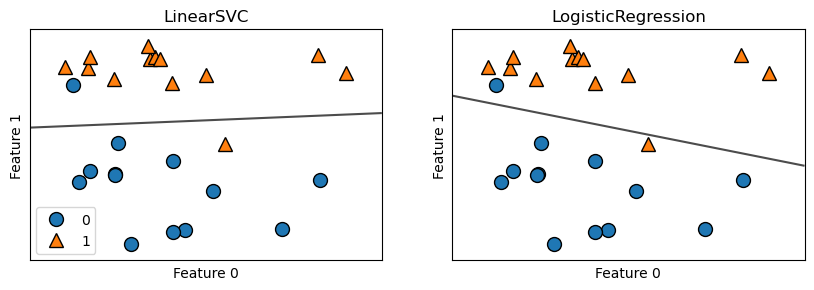

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()
plt.show()

- 위 두 모델은 L2 규제를 사용
- LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C
- C의 값을 증가시키면 규제가 감소, 즉 매개변수로 높은 C값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려고 함
- 반면에 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듬(Ridge의 alpha 값과 반대)
- 다른 표현으로, 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면(포괄적으로)
- C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력할 것임(Overfitting)

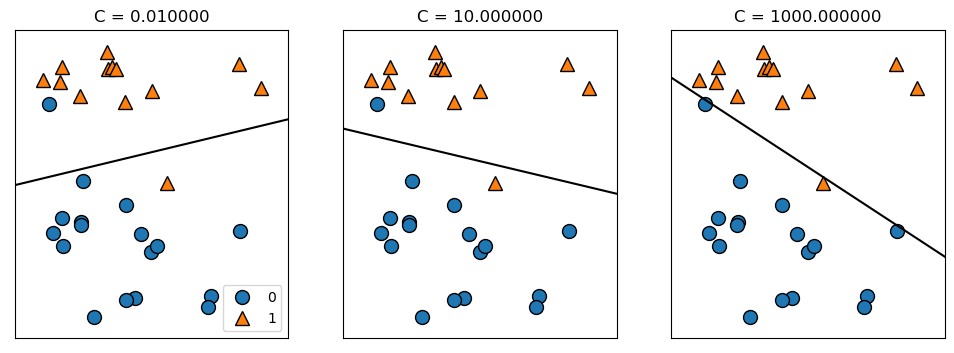

In [38]:
mglearn.plots.plot_linear_svc_regularization()
plt.show()

- 첫 번쨰 그림은 아주 작은 C값 때문에 규제가 많이 적용되었음, 클래스 0의 대부분은 아래에 있고 클래스 1의 대부분은 위에 있음
- 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만들었고, 잘못 분류한 데이터 포인트는 두 개임
- 두 번째 그림은 C 값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌음
- 마지막 그림에서 C 값을 아주 크게 했더니, 결정 경계는 더 기울어졌고 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류
- 이 데이터셋의 모든 포인트를 직선으로는 완벽히 분류할 수 없기에 클래스 1의 포인트 하나는 여전히 잘못 분류되었음
- 마지막 그림의 모델은 모든 데이터 포인트를 정확하게 분류하려고 애썼지만 클래스의 전체적인 배치를 잘 파악하지 못한 거임, 즉 Overfitting
- 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것처럼 보임
- 그러나 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 feature가 많아지면 과대적합되지 않도록 하는 것이 매우 종요함

In [39]:
# 우리가 한번 ligostic regression을 직접 써보자

In [42]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = \
                    train_test_split(cancer.data, cancer.target,\
                                    stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)  # max_iter=10000 안주면 빨간 경고 뜸(계산 제대로 안됨)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


- 기본값 C=1 이 훈련 세트와 테슽 세트 양쪽에 94% ~ 96% 정확도를 내는 훌륭한 성능
- 하지만 훈련 세트와 테스트 세트의 성능이 매우 비숫하므로 과소적합일 가능성 큼

In [44]:
logreg10 = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test, y_test)))

Training set score: 0.977
Test set score: 0.965


In [45]:
# 이번엔 반대로 규제를 강하게 해봅시다

logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

# 그랬더니 아까보다 더 과소적합적으로 가고있음.

Training set score: 0.953
Test set score: 0.951


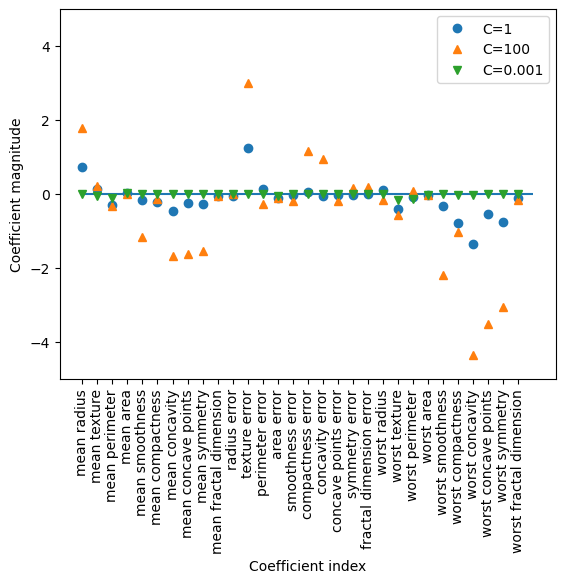

In [46]:
# 그래프로 확인해보자

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg10.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

- 더 이해하기 쉬운 모델을 원한다면 L1 규제를 사용하는 것이 좋음

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


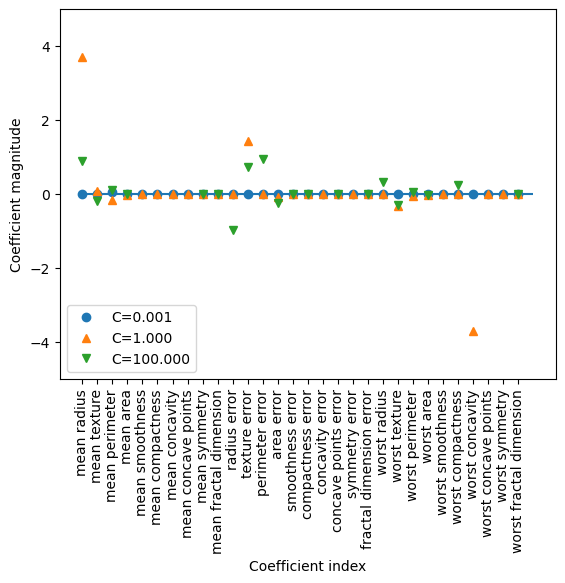

In [47]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

# C가 100.000일때 99, 98 이상을 맞추니까, 이때가 제일 좋음

### 다중 클래스 분류용 선형 모델
- LogisticRegression 을 제외하면 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원함
- 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다(one-vs.-rest)방법임
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴
- 결국 클래스의 수만큼 이진 분류 모델이 만들어짐
- 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택함
- 클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터(w)와 절편(b)을 하나씩 갖게 됨
- 결국 분류 신뢰도를 나타내는 다음 공식의 결과값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당됨
- w[0] * x[0] + w[1] + ... + w[p] * x[p] + b

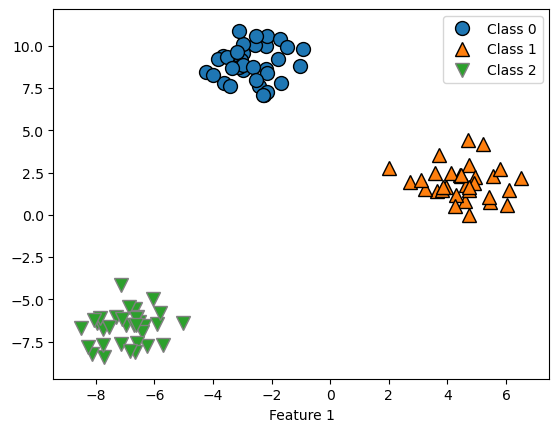

In [49]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [50]:
linear_svm = LinearSVC().fit(X, y)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

# row 3개, column 2개  -> Coefficient shape:  (3, 2)
# 절편 3개,  ->  Intercept shape:  (3,)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


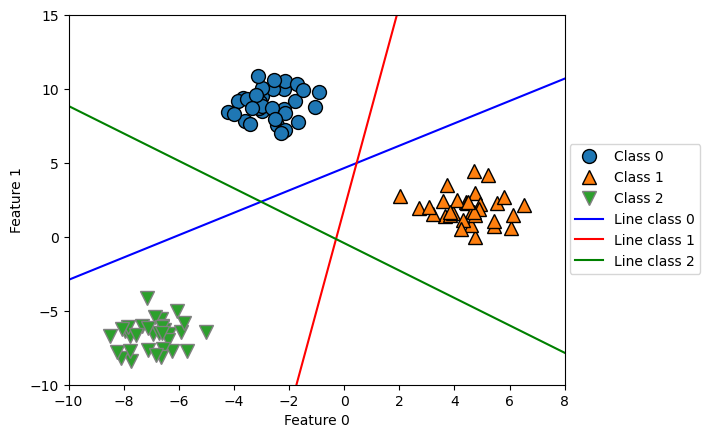

In [51]:
# 이런 식으로 모듈이 3개라는 소리

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.show()

- 클래스 0에 속한 모든 포인트는 나머지 클래스의 직선 위에 있으므로 나머지 클래스들에 의해 others 로 분류됨
- 그림 중앙의 삼각형 영역은 세 분류기 모두 나머지로 분류함
- 이 곳의 데이터 포인트는 어떤 클래스로 분류되는가?
- 분류 공식의 결과가 가장 높은 클래스로 분류됨, 즉 가장 가까운 직선의 클래스로 됨
- 다음 예는 2차원 평면의 모든 포인트에 대한 예측 결과를 시각화 한 것임

In [52]:
# 빨간 선 기준으로 오른쪽에 있는 것들은, 주황색.
# 빈공간은 0, 나머지는 어떻게 분류?
# 각 포인트에 대한 걸 시각화 해보면

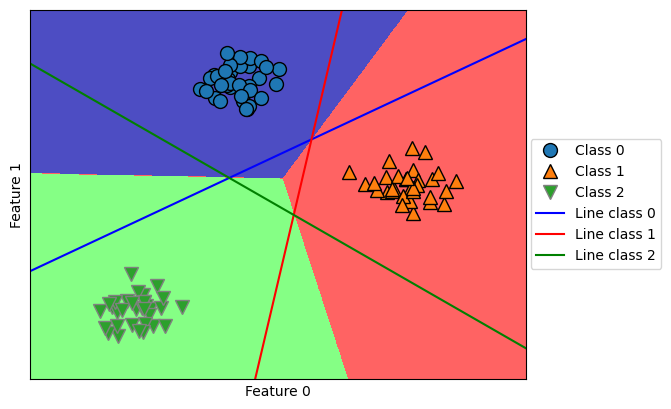

In [53]:
# class 1, 2 로 판단하기.

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### 장단점과 매개변수
- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고, LinearSVC와 LogisticRegression 에서는 C임
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해 짐
- 보통 C와 alpha는 로그 스케일로 최적치를 정함(10배씩 변경)
- 그리고 L1 규제를 사용할지 L2 규제를 사용할지를 정해야 함
- 중요한 feature가 많지 않다고 생각하면 L1 규제를 사용, 그렇지 않다면 기본적으로 L2 규제를 사용해야 함
- 모델의 해석이 중요한 경우 L1 규제는 해당 모델의 중요한 feature가 무엇이고 얼마나 영향을 미치는지 설명하기 쉬움
- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동함
- 선형 모델은 샘플에 비해 feature가 많을 때 잘 동작함